In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np

print(tf.__version__)

2.0.0


In [27]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True,
    with_info=True)

In [53]:
encoder = info.features['text'].encoder

In [61]:
print("Vocabulary size of the encoder is", encoder.vocab_size)

Vocabulary size of the encoder is 8185


In [69]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is', encoded_string)

original_string = encoder.decode(encoded_string)
print('Decoded string is', original_string)

assert original_string == sample_string

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
Decoded string is Hello TensorFlow.


In [72]:
for ts in encoded_string:
    print('{} -----> {}'.format(ts, encoder.decode([ts])))

4025 -----> Hell
222 -----> o 
6307 -----> Ten
2327 -----> sor
4043 -----> Fl
2120 -----> ow
7975 -----> .


In [89]:
for train_example, train_label in train_data.take(1):
    print('Encoded text:', train_example[:10].numpy())
    print('Label:', train_label.numpy())

Encoded text: [2080 4956   90 7174    4 4669  190   25  162   15]
Label: 1


In [98]:
encoder.decode(train_example)

"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the storyline is awesome is very unique and i'm sure u are going to like it. Jenna amazed us once more and no wonder the movie won so many awards. Her make-up and wardrobe is very very sexy and the girls on girls scene is amazing. specially the one where she looks like an angel. It's a must see and i hope u share my interests"

In [93]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, train_data.output_shapes))

test_batches = (
    test_data
    .padded_batch(32, train_data.output_shapes))

In [99]:
for example_batch, label_batch in train_batches.take(2):
    print("Batch shape:", example_batch.shape)
    print("label shape:", label_batch.shape)

Batch shape: (32, 1217)
label shape: (32,)
Batch shape: (32, 1031)
label shape: (32,)


In [101]:
model = keras.Sequential([
    keras.layers.Embedding(encoder.vocab_size, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [103]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 8s 11ms/step - loss: 0.6816 - accuracy: 0.6210 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 0.6227 - accuracy: 0.7466 - val_loss: 0.5951 - val_accuracy: 0.7875
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.5435 - accuracy: 0.8054 - val_loss: 0.5318 - val_accuracy: 0.8083
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 0.4775 - accuracy: 0.8415 - val_loss: 0.4774 - val_accuracy: 0.8479
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4239 - accuracy: 0.8635 - val_loss: 0.4343 - val_accuracy: 0.8562
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.3833 - accuracy: 0.8748 - val_loss: 0.4019 - val_accuracy: 0.8635
Epoch 7/10
782/782 [==============================] - 4s 6ms/step - loss: 0.3514 - accuracy: 0.8849 - val_loss: 0.3791 - val_accuracy: 0.86

In [104]:
loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 5s 6ms/step - loss: 0.3326 - accuracy: 0.8767
Loss:  0.3326021441641976
Accuracy:  0.87672


In [105]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

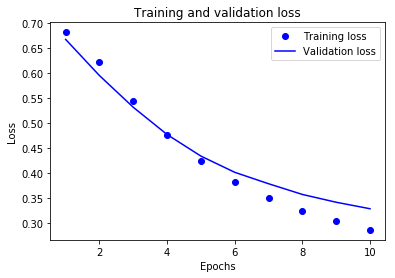

In [114]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.clf()

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

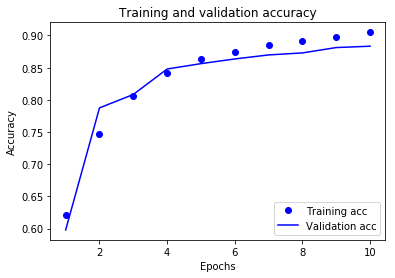

In [112]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()